## Загрузка библиотек

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import sklearn
from imblearn.over_sampling import SMOTE

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [128]:
hr_data = pd.read_csv('/Users/olga/Downloads/BI_ML21_HW-main/hw1_data/hr.csv')
hr_data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [77]:
covid_data = pd.read_csv('/Users/olga/Downloads/BI_ML21_HW-main/hw1_data/covid.csv')
covid_data.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [78]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    covid_data = pd.read_csv(path_to_csv)
    X = covid_data.values
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    hr_data = pd.read_csv(path_to_csv)
    X = hr_data.drop('target', axis=1).values 
    y = hr_data['target'].values 
    return X, y

In [79]:
COVID_DATA_PATH = '/Users/olga/Downloads/BI_ML21_HW-main/hw1_data/covid.csv'
HR_DATA_PATH = '/Users/olga/Downloads/BI_ML21_HW-main/hw1_data/hr.csv' 

In [80]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [81]:
hr_data = pd.read_csv('/Users/olga/Downloads/BI_ML21_HW-main/hw1_data/hr.csv')
hr_cols = hr_data.columns
num_cols = hr_data._get_numeric_data().columns # числовые признаки
categorical_cols = list(set(hr_cols) - set(num_cols)) # категориальные признаки

In [82]:
def numerical_statistics(data, num_cols):
    for column in num_cols:
        sns.displot(data, x=column, kde=True)

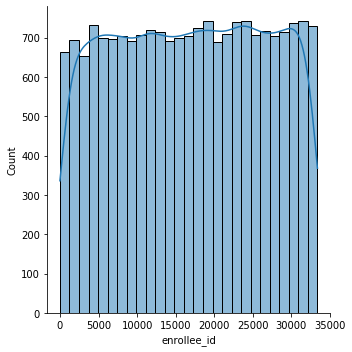

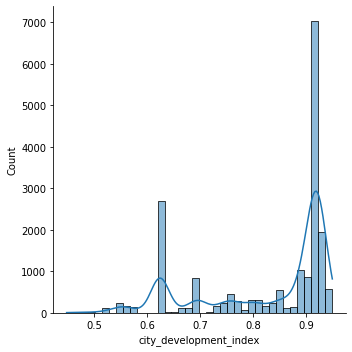

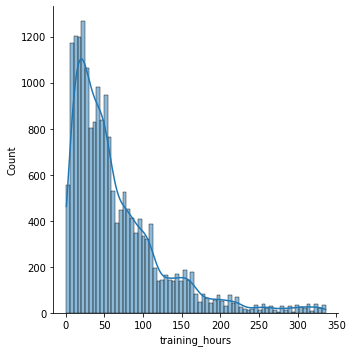

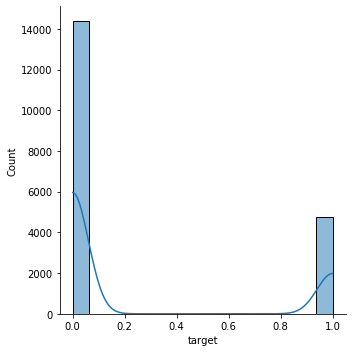

In [83]:
numerical_statistics(hr_data, num_cols)

In [84]:
def categorical_statistics(data, categorical_cols):
    for column in categorical_cols:
        a = np.array(data[column])
        a[np.where(a.astype(str)==str(np.nan))] = str(np.nan)
        unique_values, counts = np.unique(a.astype(str), return_counts=True)
        plt.figure(figsize=(12, 8))
        sns.barplot(x=unique_values, y=counts)
        plt.title(column)
        plt.show()
        print(dict(zip(unique_values, counts)))

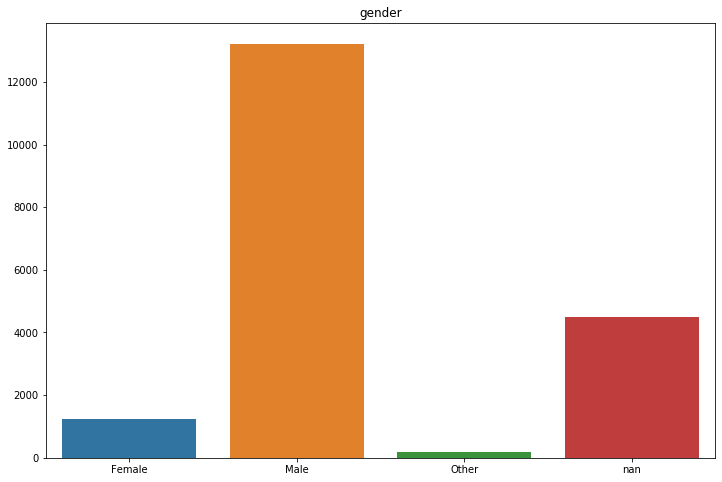

{'Female': 1238, 'Male': 13221, 'Other': 191, 'nan': 4508}


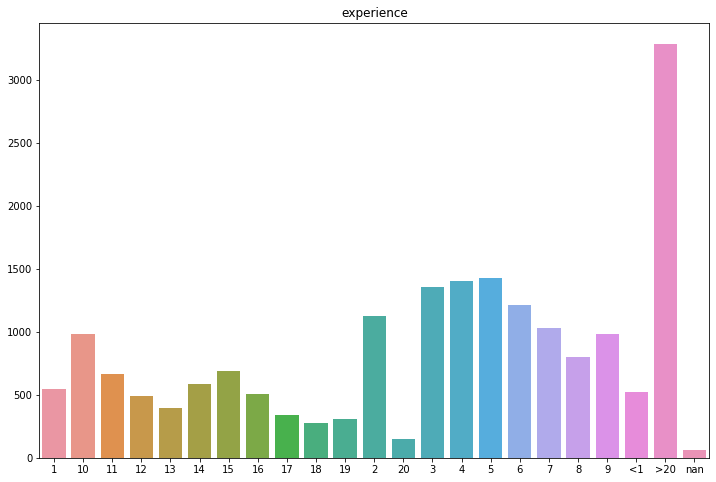

{'1': 549, '10': 985, '11': 664, '12': 494, '13': 399, '14': 586, '15': 686, '16': 508, '17': 342, '18': 280, '19': 304, '2': 1127, '20': 148, '3': 1354, '4': 1403, '5': 1430, '6': 1216, '7': 1028, '8': 802, '9': 980, '<1': 522, '>20': 3286, 'nan': 65}


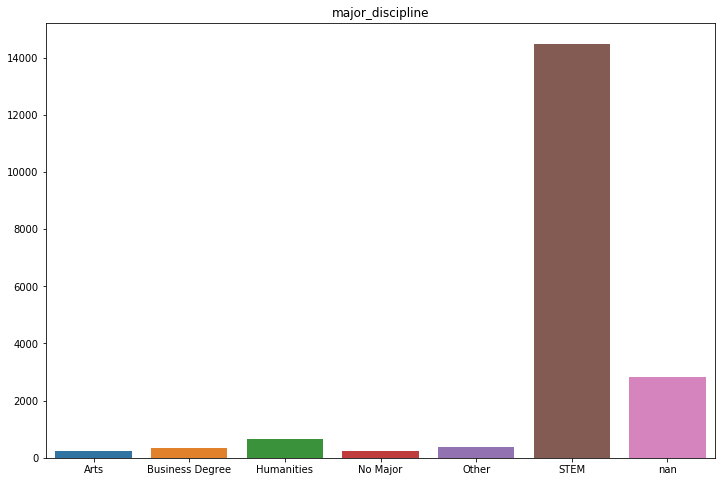

{'Arts': 253, 'Business Degree': 327, 'Humanities': 669, 'No Major': 223, 'Other': 381, 'STEM': 14492, 'nan': 2813}


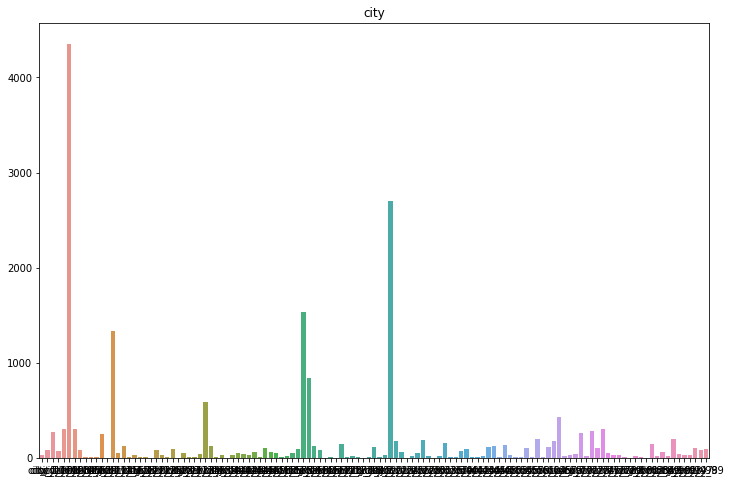

{'city_1': 26, 'city_10': 86, 'city_100': 275, 'city_101': 75, 'city_102': 304, 'city_103': 4355, 'city_104': 301, 'city_105': 79, 'city_106': 9, 'city_107': 6, 'city_109': 9, 'city_11': 247, 'city_111': 3, 'city_114': 1336, 'city_115': 54, 'city_116': 128, 'city_117': 13, 'city_118': 27, 'city_12': 13, 'city_120': 6, 'city_121': 3, 'city_123': 79, 'city_126': 28, 'city_127': 10, 'city_128': 92, 'city_129': 3, 'city_13': 48, 'city_131': 9, 'city_133': 10, 'city_134': 43, 'city_136': 586, 'city_138': 120, 'city_139': 5, 'city_14': 28, 'city_140': 1, 'city_141': 27, 'city_142': 53, 'city_143': 41, 'city_144': 29, 'city_145': 63, 'city_146': 8, 'city_149': 102, 'city_150': 65, 'city_152': 51, 'city_155': 14, 'city_157': 22, 'city_158': 49, 'city_159': 94, 'city_16': 1533, 'city_160': 845, 'city_162': 128, 'city_165': 82, 'city_166': 4, 'city_167': 10, 'city_171': 1, 'city_173': 151, 'city_175': 14, 'city_176': 24, 'city_179': 5, 'city_18': 4, 'city_180': 7, 'city_19': 119, 'city_2': 7, 'c

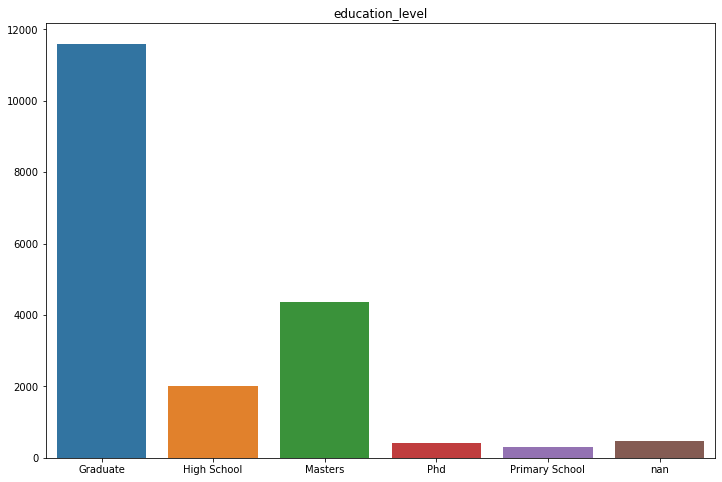

{'Graduate': 11598, 'High School': 2017, 'Masters': 4361, 'Phd': 414, 'Primary School': 308, 'nan': 460}


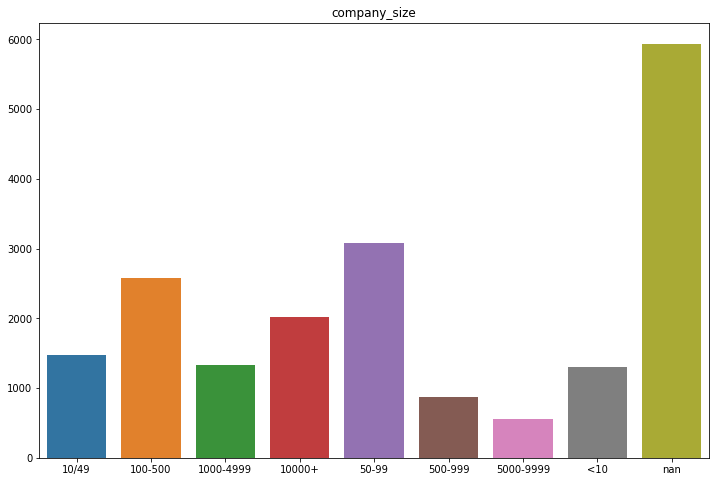

{'10/49': 1471, '100-500': 2571, '1000-4999': 1328, '10000+': 2019, '50-99': 3083, '500-999': 877, '5000-9999': 563, '<10': 1308, 'nan': 5938}


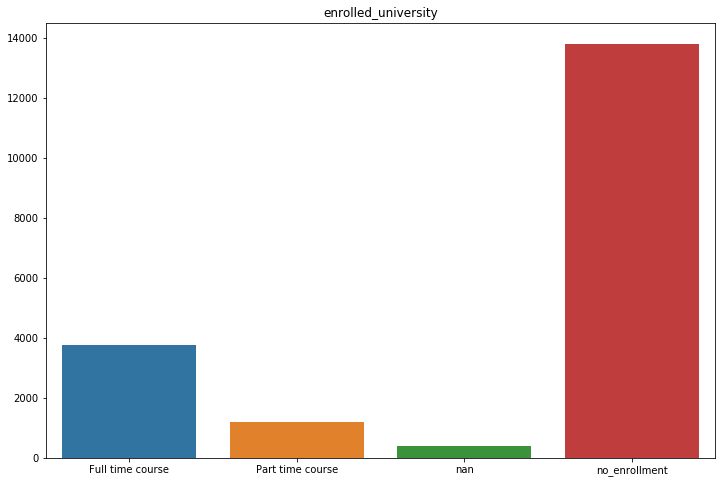

{'Full time course': 3757, 'Part time course': 1198, 'nan': 386, 'no_enrollment': 13817}


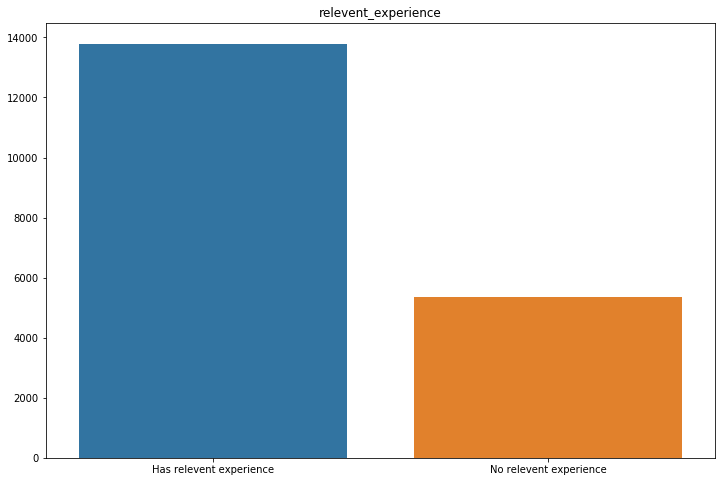

{'Has relevent experience': 13792, 'No relevent experience': 5366}


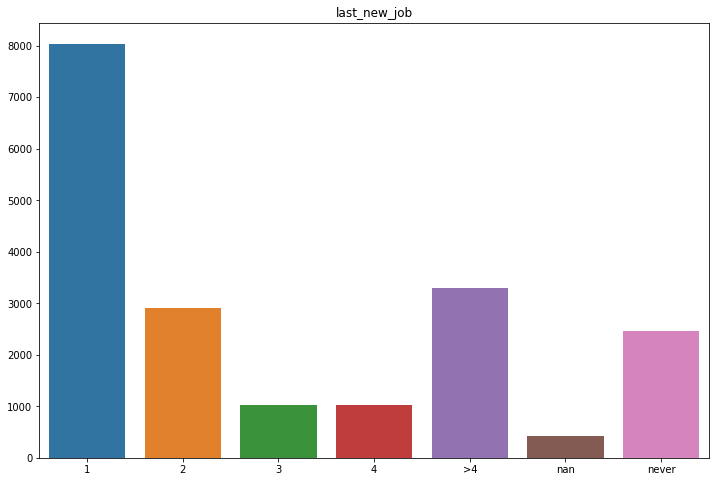

{'1': 8040, '2': 2900, '3': 1024, '4': 1029, '>4': 3290, 'nan': 423, 'never': 2452}


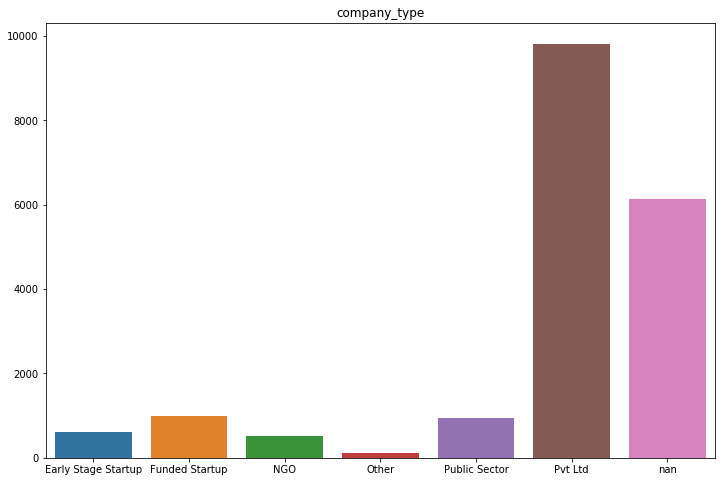

{'Early Stage Startup': 603, 'Funded Startup': 1001, 'NGO': 521, 'Other': 121, 'Public Sector': 955, 'Pvt Ltd': 9817, 'nan': 6140}


In [85]:
categorical_statistics(hr_data, categorical_cols)

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [86]:
print(f'Исходный размер датасета hr: {hr_data.shape}')

Исходный размер датасета hr: (19158, 14)


In [87]:
X_hr_dropna = hr_data.dropna()

In [88]:
print(f'Pазмер датасета hr без NaN {X_hr_dropna.shape}')

Pазмер датасета hr без NaN (8955, 14)


_Ваш ответ_

Размер датасета уменьшился более чем в 2 раза. Посмотрим, как изменились статистики.

In [89]:
hr_dropna_cols = X_hr_dropna.columns
dropna_num_cols = X_hr_dropna._get_numeric_data().columns # числовые признаки
dropna_categorical_cols = list(set(hr_dropna_cols) - set(dropna_num_cols)) # категориальные признаки

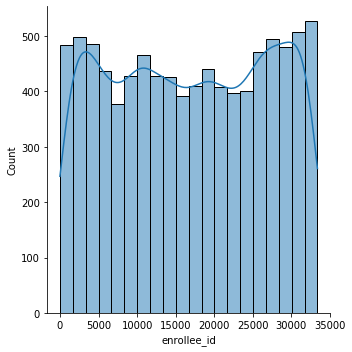

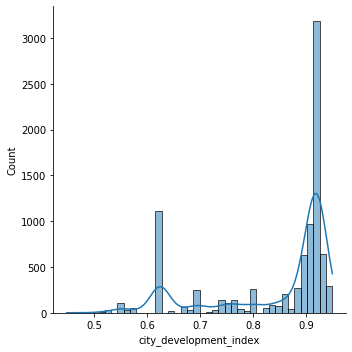

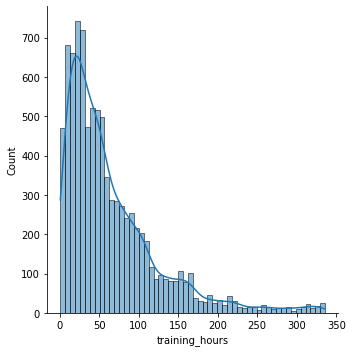

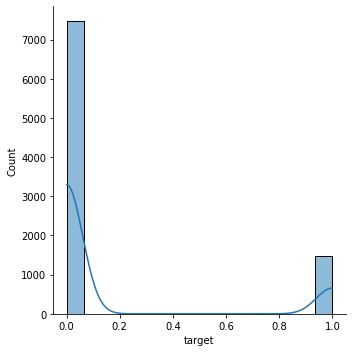

In [90]:
numerical_statistics(X_hr_dropna, dropna_num_cols)

Видим, что распределение числовых признаков практически не изменилось; несколько изменилось распределение признака enrollee_id (стало менее однородным). Посмотрим на категориальные признаки.

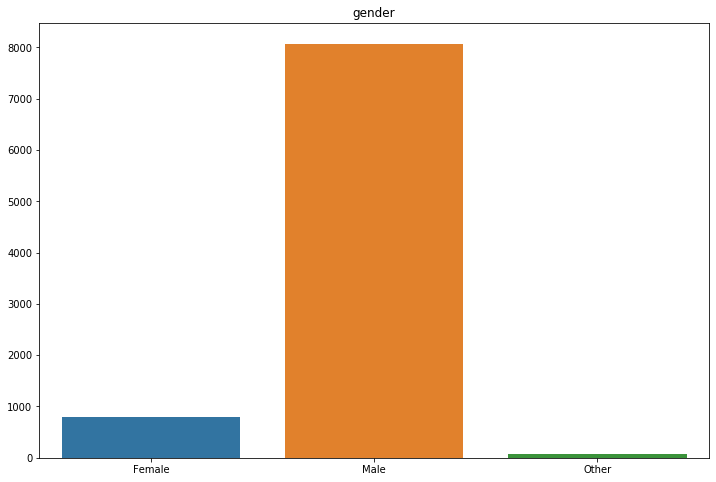

{'Female': 804, 'Male': 8073, 'Other': 78}


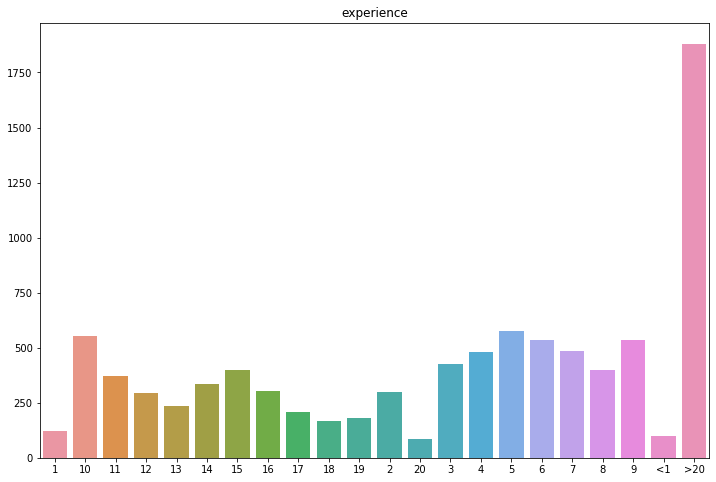

{'1': 121, '10': 551, '11': 372, '12': 293, '13': 235, '14': 333, '15': 398, '16': 304, '17': 206, '18': 168, '19': 179, '2': 297, '20': 86, '3': 428, '4': 480, '5': 575, '6': 535, '7': 485, '8': 398, '9': 533, '<1': 97, '>20': 1881}


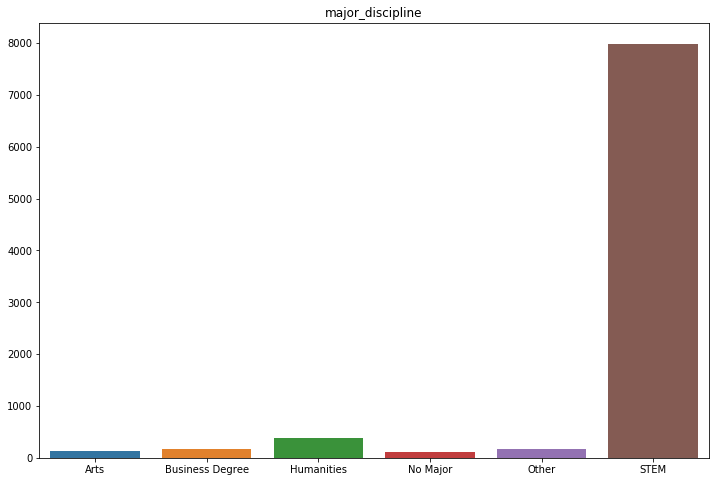

{'Arts': 129, 'Business Degree': 170, 'Humanities': 378, 'No Major': 112, 'Other': 177, 'STEM': 7989}


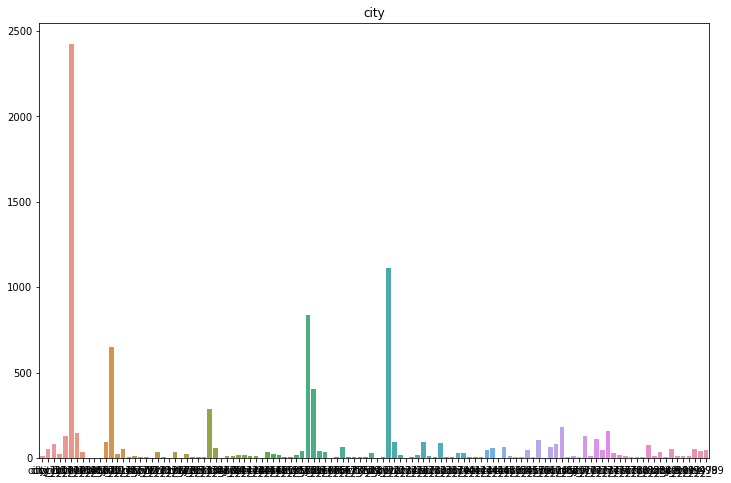

{'city_1': 13, 'city_10': 52, 'city_100': 82, 'city_101': 24, 'city_102': 126, 'city_103': 2426, 'city_104': 146, 'city_105': 35, 'city_106': 2, 'city_107': 1, 'city_109': 1, 'city_11': 95, 'city_114': 648, 'city_115': 21, 'city_116': 52, 'city_117': 4, 'city_118': 9, 'city_12': 6, 'city_120': 4, 'city_121': 1, 'city_123': 32, 'city_126': 3, 'city_127': 1, 'city_128': 32, 'city_129': 1, 'city_13': 21, 'city_131': 5, 'city_133': 6, 'city_134': 5, 'city_136': 288, 'city_138': 57, 'city_139': 1, 'city_14': 11, 'city_141': 11, 'city_142': 19, 'city_143': 18, 'city_144': 12, 'city_145': 14, 'city_146': 2, 'city_149': 32, 'city_150': 24, 'city_152': 16, 'city_155': 7, 'city_157': 8, 'city_158': 19, 'city_159': 43, 'city_16': 836, 'city_160': 401, 'city_162': 38, 'city_165': 36, 'city_166': 2, 'city_167': 6, 'city_173': 62, 'city_175': 5, 'city_176': 7, 'city_179': 3, 'city_18': 3, 'city_19': 31, 'city_2': 2, 'city_20': 7, 'city_21': 1111, 'city_23': 96, 'city_24': 19, 'city_25': 1, 'city_26'

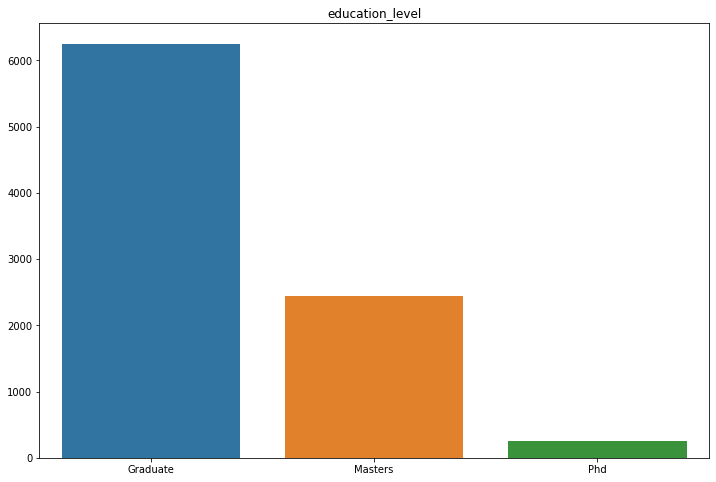

{'Graduate': 6252, 'Masters': 2449, 'Phd': 254}


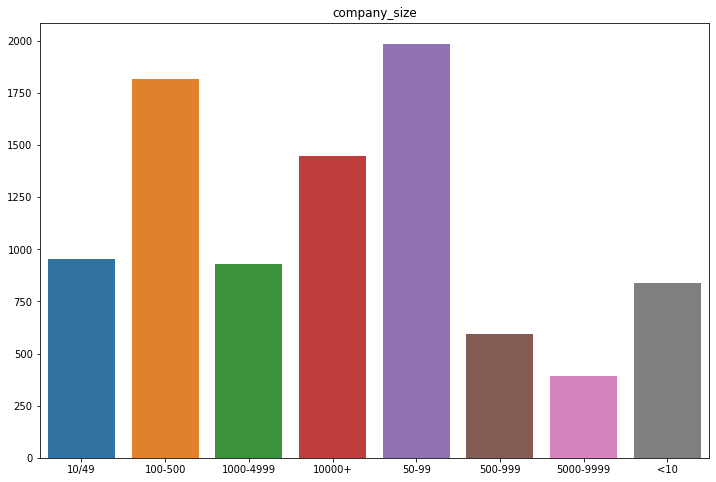

{'10/49': 951, '100-500': 1814, '1000-4999': 930, '10000+': 1449, '50-99': 1986, '500-999': 592, '5000-9999': 393, '<10': 840}


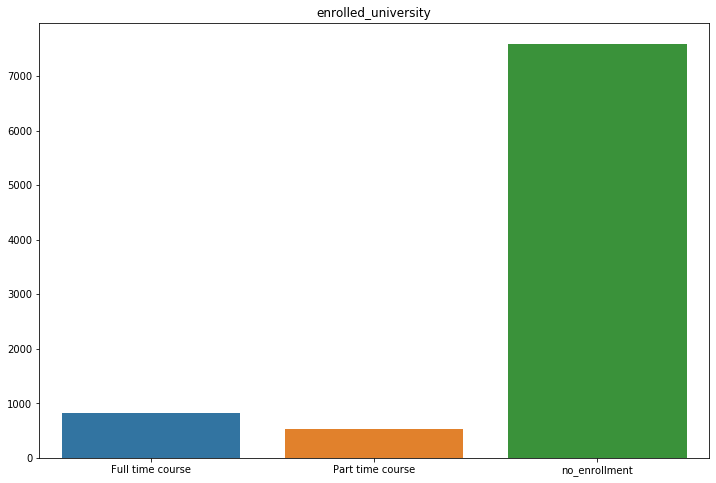

{'Full time course': 832, 'Part time course': 529, 'no_enrollment': 7594}


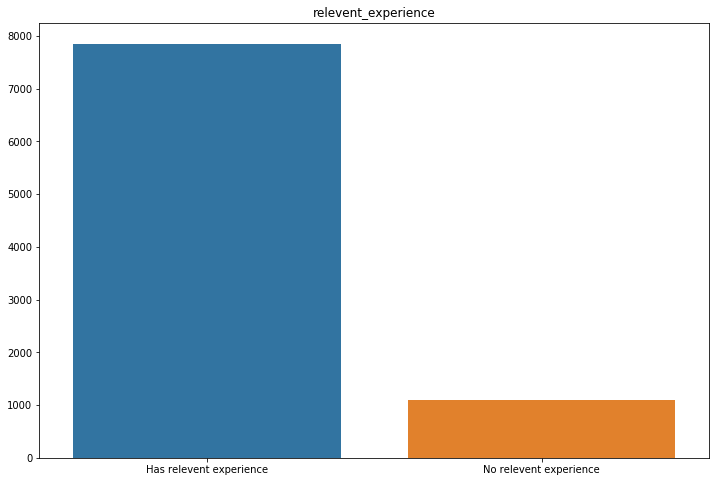

{'Has relevent experience': 7851, 'No relevent experience': 1104}


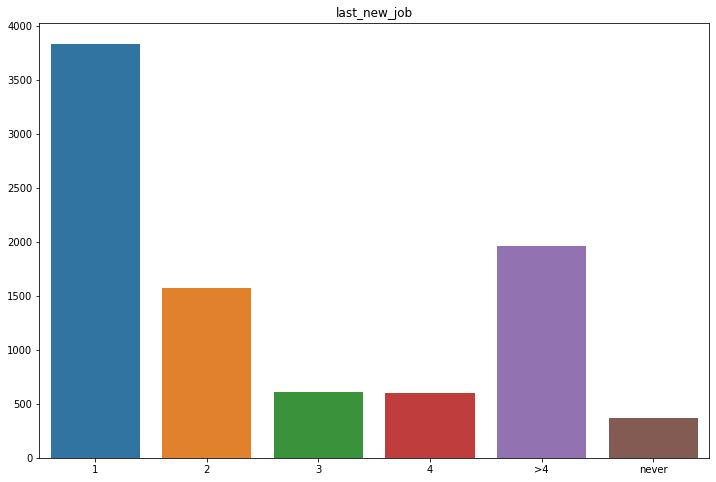

{'1': 3838, '2': 1570, '3': 610, '4': 599, '>4': 1965, 'never': 373}


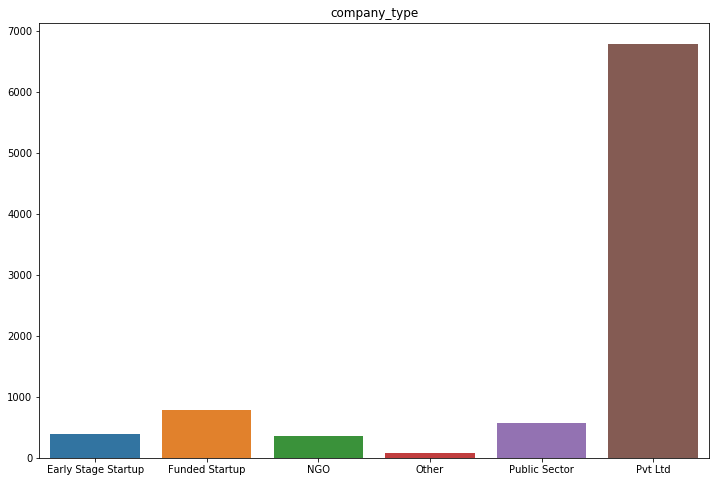

{'Early Stage Startup': 385, 'Funded Startup': 784, 'NGO': 356, 'Other': 72, 'Public Sector': 564, 'Pvt Ltd': 6794}


In [91]:
categorical_statistics(X_hr_dropna, dropna_categorical_cols)

Распределение признаков enrolled_university, company_type, company_size, city, gender, experience, last_new_job, major_discipline практически не изменилось, в признаке education_level пропало несколько значений (High School, Primary School) - это выглядит логично, поскольку у студентов и школьников может пока не быть работы и соответствующие графы они заполнять не будут, в признаке relevant_experience виден больший отрыв значения no relevant experience от has relevant experience. 

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

In [129]:
def fill_numerical(data, column, ix):
    if ix == 'mean':
        data[column] = data[column].replace(np.nan, data[column].mean())
    elif ix == 'median':
        data[column] = data[column].replace(np.nan, data[column].median())
    elif ix == 'mode':
        data[column] = data[column].replace(np.nan, data[column].mode())
    return

Пропущенные данные для enrollee_id заменим на среднее, поскольку распределение по данным однородно

In [130]:
fill_numerical(hr_data, 'enrollee_id', ix='mean')

Пропущенные данные для city_development_index заменим на медиану, поскольку есть выбросы

In [131]:
fill_numerical(hr_data, 'city_development_index', ix='median')

In [132]:
hr_data['training_hours'].mean()

65.36689633573442

Пропущенные данные для training_hours заменим на медиану, поскольку данные расположены несимметрично относительно среднего (65.3669).

In [133]:
fill_numerical(hr_data, 'training_hours', ix='median')

Пропущенные данные для target заменим на моду, поскольку одно из двух значений встречается чаще

In [134]:
fill_numerical(hr_data, 'target', ix='mode')

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [135]:
def fill_categorical(data, column, ix):
    if ix == 'most_common':
        data[column] = data[column].replace(np.nan, data[column].value_counts().index[0])
    elif ix == 'unknown':
        data[column] = data[column].fillna('Uknown')
    return

Заменим пропущенные данные для признаков enrolled_university, education_level, gender, experience, major_discipline на самую часто встречающуюся категорию, поскольку считаем, что эти данные отсутствуют случайно (они могли бы быть собраны)

In [136]:
fill_categorical(hr_data, 'enrolled_university', 'most_common')
fill_categorical(hr_data, 'education_level', 'most_common')
fill_categorical(hr_data, 'gender', 'most_common')
fill_categorical(hr_data, 'experience', 'most_common')
fill_categorical(hr_data, 'major_discipline', 'most_common')

Заменим пропущенные данные для признаков company_type, company_size, last_new_job на тип unknown, поскольку можно предположить, что эти данные отсутствуют "намеренно" (школьники / студенты могли не указать информацию про работу, потому что её у них нет, количество предыдущих мест работы не все хотят раскрывать, также как информацию про своё текущее место работы).

In [137]:
fill_categorical(hr_data, 'company_type', 'unknown')
fill_categorical(hr_data, 'company_size', 'unknown')
fill_categorical(hr_data, 'last_new_job', 'unknown')

Признаки relevant_experience, city не рассматривали, поскольку там нет отсутствующих данных

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

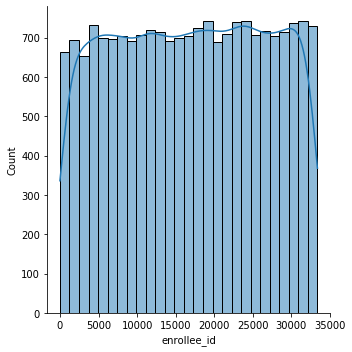

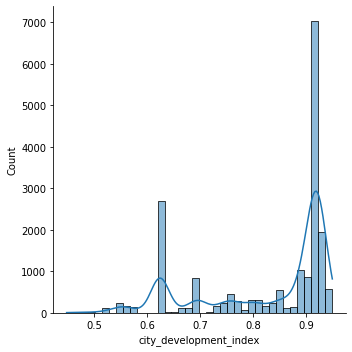

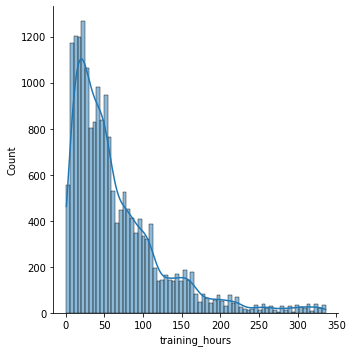

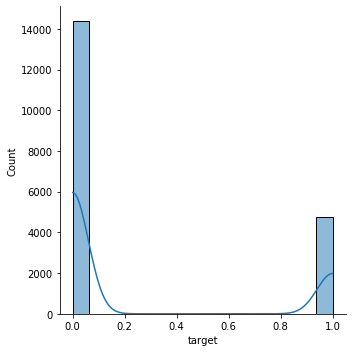

In [138]:
numerical_statistics(hr_data, num_cols)

Распределение числовых признаков в целом не изменилось, разве что вырос диапазон значений

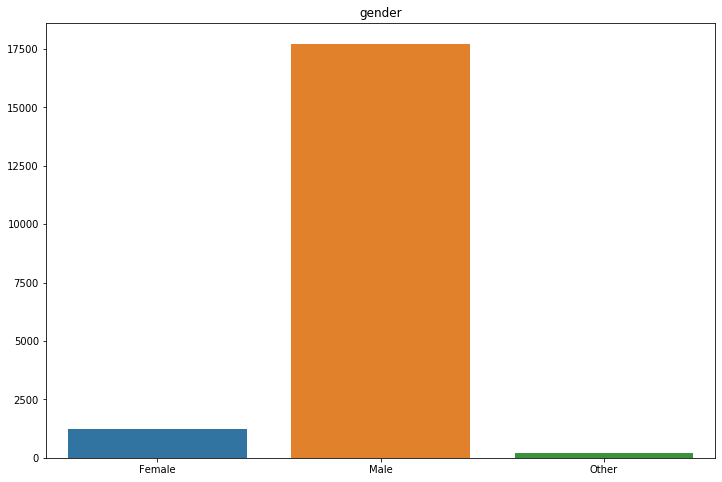

{'Female': 1238, 'Male': 17729, 'Other': 191}


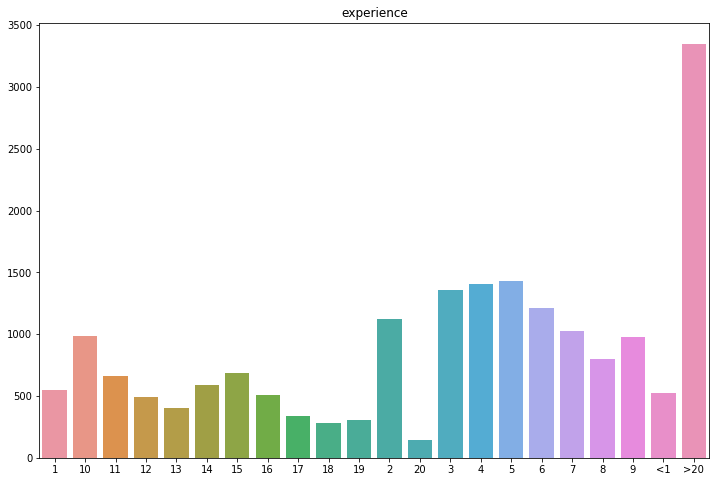

{'1': 549, '10': 985, '11': 664, '12': 494, '13': 399, '14': 586, '15': 686, '16': 508, '17': 342, '18': 280, '19': 304, '2': 1127, '20': 148, '3': 1354, '4': 1403, '5': 1430, '6': 1216, '7': 1028, '8': 802, '9': 980, '<1': 522, '>20': 3351}


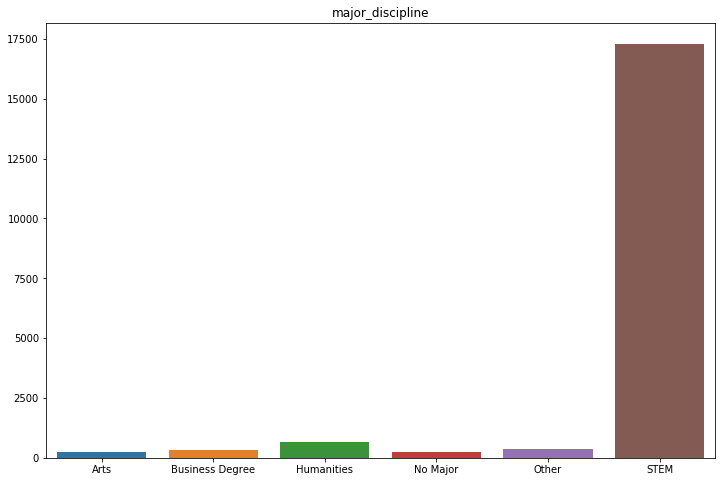

{'Arts': 253, 'Business Degree': 327, 'Humanities': 669, 'No Major': 223, 'Other': 381, 'STEM': 17305}


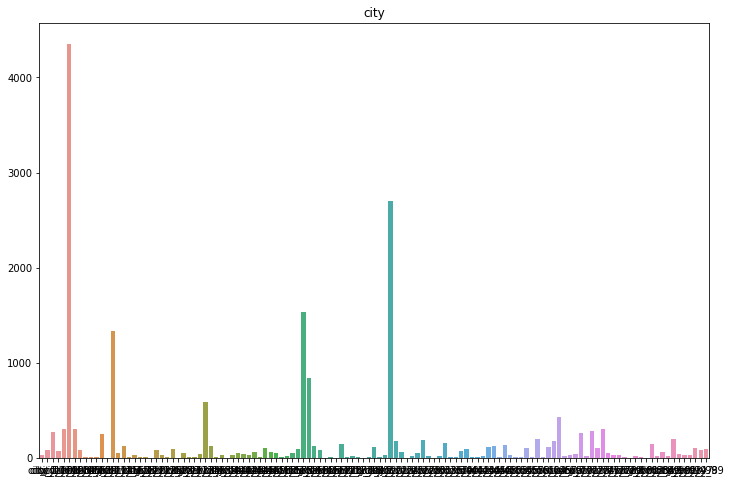

{'city_1': 26, 'city_10': 86, 'city_100': 275, 'city_101': 75, 'city_102': 304, 'city_103': 4355, 'city_104': 301, 'city_105': 79, 'city_106': 9, 'city_107': 6, 'city_109': 9, 'city_11': 247, 'city_111': 3, 'city_114': 1336, 'city_115': 54, 'city_116': 128, 'city_117': 13, 'city_118': 27, 'city_12': 13, 'city_120': 6, 'city_121': 3, 'city_123': 79, 'city_126': 28, 'city_127': 10, 'city_128': 92, 'city_129': 3, 'city_13': 48, 'city_131': 9, 'city_133': 10, 'city_134': 43, 'city_136': 586, 'city_138': 120, 'city_139': 5, 'city_14': 28, 'city_140': 1, 'city_141': 27, 'city_142': 53, 'city_143': 41, 'city_144': 29, 'city_145': 63, 'city_146': 8, 'city_149': 102, 'city_150': 65, 'city_152': 51, 'city_155': 14, 'city_157': 22, 'city_158': 49, 'city_159': 94, 'city_16': 1533, 'city_160': 845, 'city_162': 128, 'city_165': 82, 'city_166': 4, 'city_167': 10, 'city_171': 1, 'city_173': 151, 'city_175': 14, 'city_176': 24, 'city_179': 5, 'city_18': 4, 'city_180': 7, 'city_19': 119, 'city_2': 7, 'c

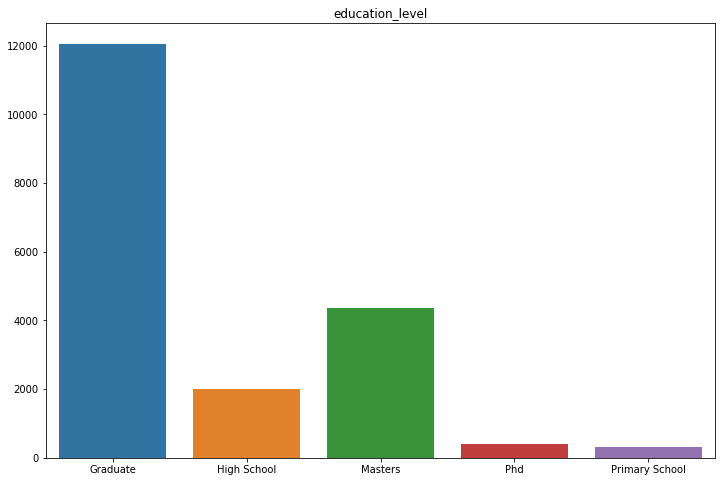

{'Graduate': 12058, 'High School': 2017, 'Masters': 4361, 'Phd': 414, 'Primary School': 308}


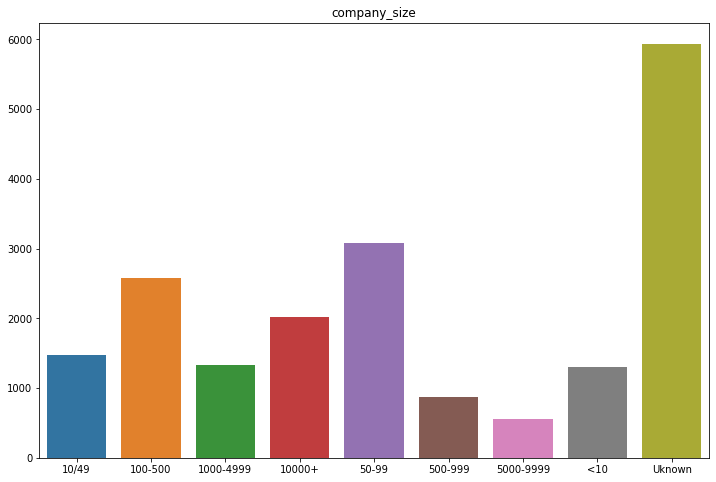

{'10/49': 1471, '100-500': 2571, '1000-4999': 1328, '10000+': 2019, '50-99': 3083, '500-999': 877, '5000-9999': 563, '<10': 1308, 'Uknown': 5938}


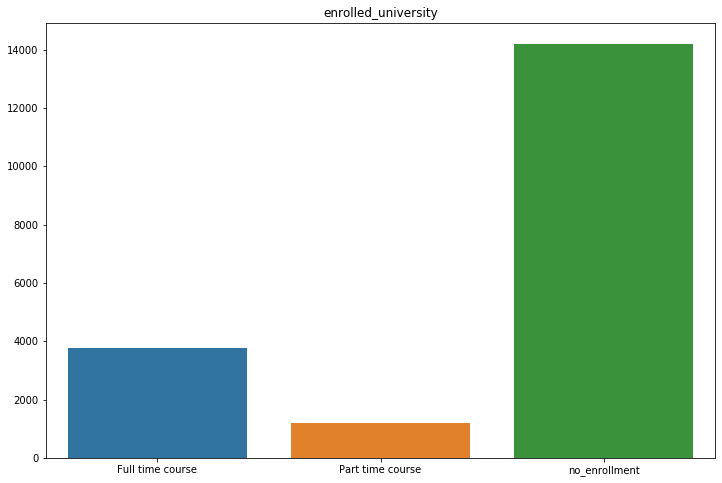

{'Full time course': 3757, 'Part time course': 1198, 'no_enrollment': 14203}


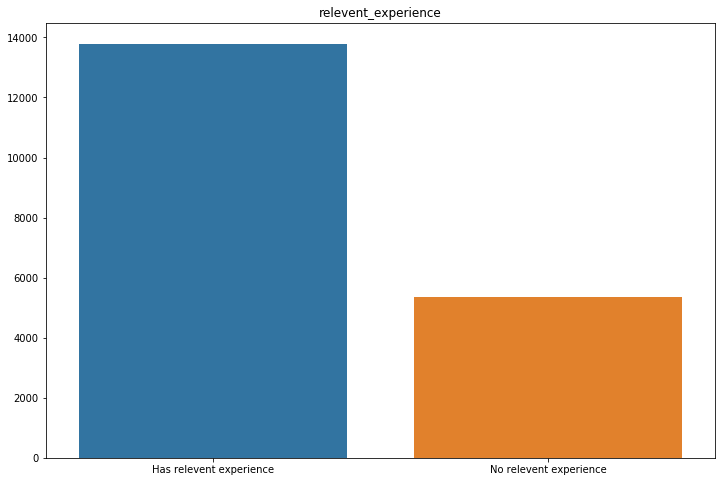

{'Has relevent experience': 13792, 'No relevent experience': 5366}


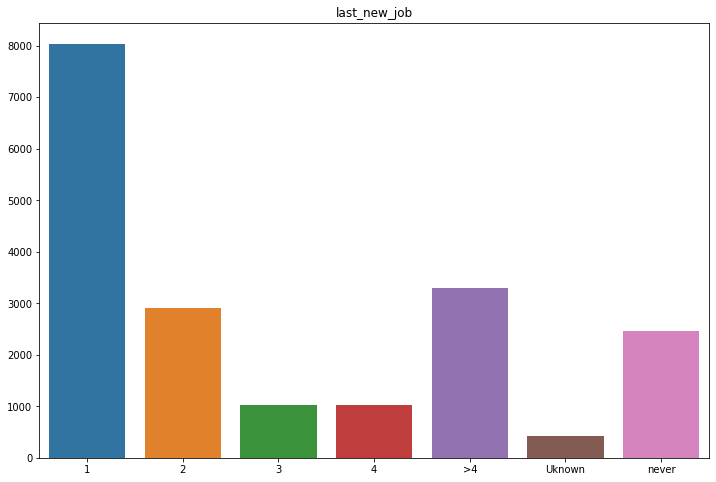

{'1': 8040, '2': 2900, '3': 1024, '4': 1029, '>4': 3290, 'Uknown': 423, 'never': 2452}


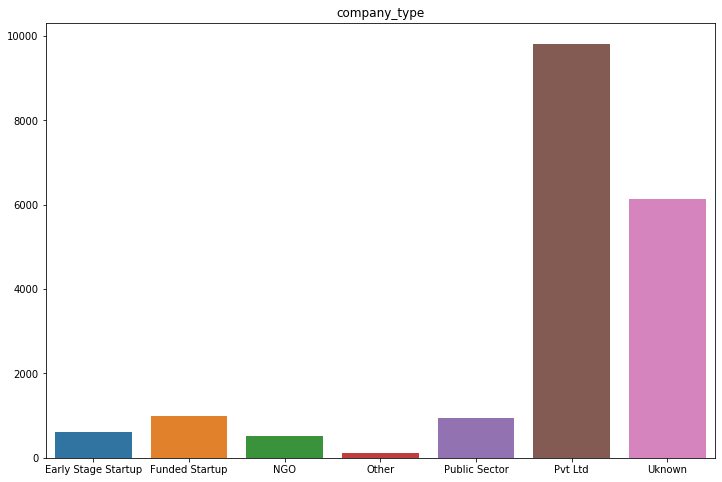

{'Early Stage Startup': 603, 'Funded Startup': 1001, 'NGO': 521, 'Other': 121, 'Public Sector': 955, 'Pvt Ltd': 9817, 'Uknown': 6140}


In [139]:
categorical_statistics(hr_data, categorical_cols)

Статистика по категориальным признакам в целом не изменилась; в тех колонках, где мы добавили most_common, увеличился отрыв лидирующего значения от других.

_Ваш ответ_

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [103]:
covid_data = pd.read_csv('/Users/olga/Downloads/BI_ML21_HW-main/hw1_data/covid.csv')
covid_data.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [104]:
countries, counts = np.unique(covid_data['country'], return_counts=True)
print(countries, counts)
# это Бахрейн
print(len(covid_data[covid_data.country == 'Bahrain']))

['Algeria' 'Andorra' 'Argentina' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Bermuda' 'Bolivia' 'Brazil' 'Bulgaria' 'Canada'
 'Cayman Islands' 'Chile' 'China' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Ecuador' 'Egypt' 'England' 'Estonia'
 'Faeroe Islands' 'Finland' 'France' 'Germany' 'Gibraltar' 'Greece'
 'Greenland' 'Guernsey' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland'
 'Isle of Man' 'Israel' 'Italy' 'Jersey' 'Kuwait' 'Latvia' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Maldives' 'Malta' 'Mexico' 'Monaco' 'Morocco'
 'Myanmar' 'Nepal' 'Netherlands' 'Northern Cyprus' 'Northern Ireland'
 'Norway' 'Oman' 'Panama' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Saint Helena' 'Saudi Arabia' 'Scotland' 'Serbia' 'Seychelles'
 'Singapore' 'Slovakia' 'Slovenia' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Wales'] [ 2  8 40 28 46  3 41 21  7 22 40 49 41 45 51 40 37 31 42 41 15  7 55 41
  9 38 41 41 27 41  1  1 41 38 23

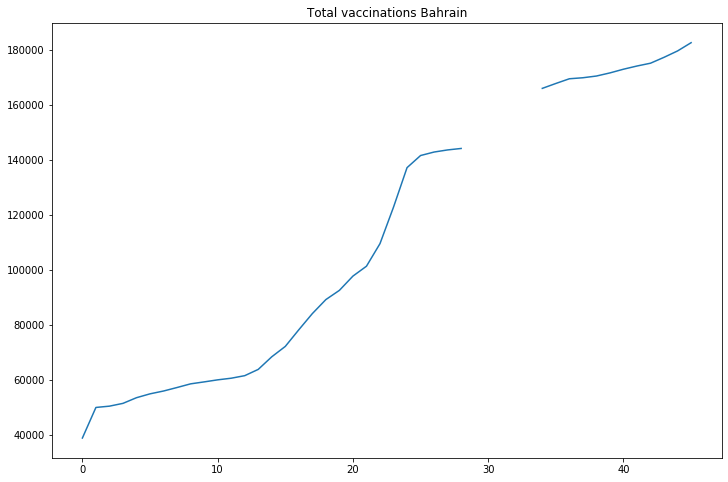

In [105]:
vaccinated = covid_data[covid_data.country == 'Bahrain'].total_vaccinations
dates = covid_data[covid_data.country == 'Bahrain'].date
x = np.arange(len(dates))
plt.figure(figsize=(12, 8))
plt.title('Total vaccinations Bahrain')
plt.plot(x, vaccinated)
plt.show()

Видно, что функция зависимости даты от общего числа вакцинированных возрастает; логично предположить, что на отсутствующем куске сохраняется та же тенденция. Заполним недостающие значения значениями на прямой, соединяющей точки разрыва.

In [107]:
bahrain_data = covid_data[covid_data.country == 'Bahrain']
maximum = np.max(bahrain_data.total_vaccinations[20:30])
minimum = np.min(bahrain_data.total_vaccinations[30:40])
drop = minimum - maximum
total = sum(np.isnan(bahrain_data.total_vaccinations))
filler = [maximum + drop * (count / total) for count in range(1, total + 1)]
bahrain_data.loc[bahrain_data.total_vaccinations.isnull(), 'total_vaccinations'] = filler

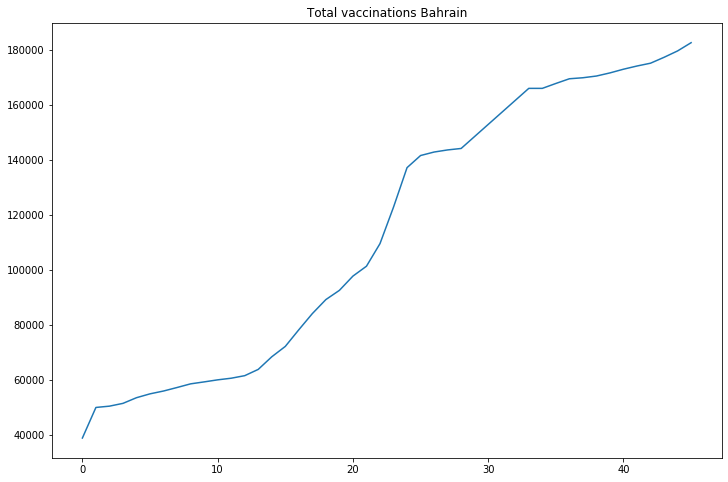

In [108]:
vaccinated = bahrain_data.total_vaccinations
dates = bahrain_data.date
x = np.arange(len(dates))
plt.figure(figsize=(12, 8))
plt.title('Total vaccinations Bahrain')
plt.plot(x, vaccinated)
plt.show()

_Ваш ответ_

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [140]:
hr_cols = hr_data.columns
num_cols = hr_data._get_numeric_data().columns # числовые признаки

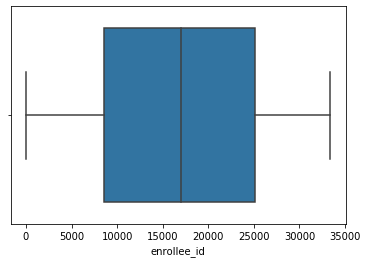

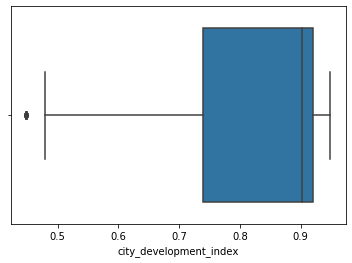

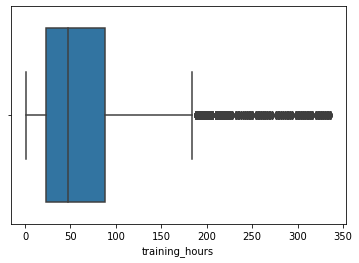

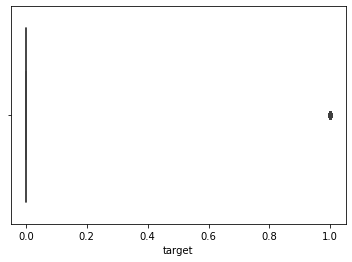

In [141]:
for column in num_cols:
    sns.boxplot(x=hr_data[column])
    plt.show()

Нарисуем boxplot'ы для числовых признаков. Видим, что в признаках city_development_index, training_hours есть выбросы (target не рассматриваем).

_Ваш ответ_

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [142]:
hr_cols = hr_data.columns
num_cols = hr_data._get_numeric_data().columns # числовые признаки
categorical_cols = list(set(hr_cols) - set(num_cols)) # категориальные признаки

In [143]:
def encode(data, column, ix):
    if ix == 'one hot':
        data = pd.get_dummies(data, columns=[column])
    elif ix == 'label':
        data[column] = LabelEncoder().fit_transform(np.array(data[column], dtype='str'))
    elif ix == 'freq':
        fe = data.groupby(column).size() / len(data)
        data.loc[:, column] = data[column].map(fe)
    return data

Закодируем категориальные признаки enrolled_university, company_type, relevent_experience, gender с помощью one hot encoding, поскольку количество уникальных значений этих признаков невелико и между ними нет градации.

In [144]:
hr_data = encode(hr_data, 'enrolled_university', 'one hot')
hr_data = encode(hr_data, 'company_type', 'one hot')
hr_data = encode(hr_data, 'relevent_experience', 'one hot')
hr_data = encode(hr_data, 'gender', 'one hot')

Закодируем категориальные признаки city, major_discipline посредством frequency encoding, поскольку количество уникальных значений этих признаков достаточно велико и нам бы хотелось оставить дополнительную информацию о данных признаках.

In [145]:
hr_data = encode(hr_data, 'city', 'freq')
hr_data = encode(hr_data, 'major_discipline', 'freq')

Закодируем остальные категориальные признаки посредством label encoding, поскольку количество уникальных значений этих признаков достаточно велико и между ними существует градация.

In [146]:
hr_data = encode(hr_data, 'company_size', 'label')
hr_data = encode(hr_data, 'education_level', 'label')
hr_data = encode(hr_data, 'experience', 'label')
hr_data = encode(hr_data, 'last_new_job', 'label')

_Ваш ответ_

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [147]:
def undersampling(data):
    minority_class_len = len(data[data['target'] == 1])
    majority_class_indices = data[data['target'] == 0].index
    random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
    minority_class_indices = data[data['target'] == 1].index
    undersample_indices = np.concatenate([minority_class_indices, random_majority_indices])
    undersampled_data = data.loc[undersample_indices]
    return undersampled_data

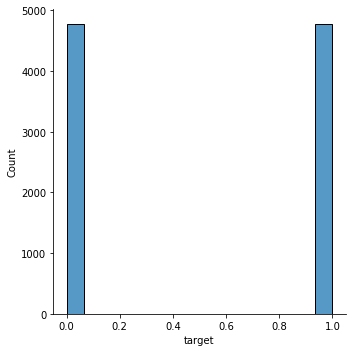

In [148]:
hr_data_undersampled = undersampling(hr_data)
sns.displot(hr_data_undersampled, x='target', kde=False)

In [149]:
def oversampling(data):
    majority_class_len = len(data[data['target'] == 0])
    minority_class_len = len(data[data['target'] == 1])
    k = int(np.floor(majority_class_len / minority_class_len))
    r = majority_class_len % minority_class_len
    oversample_indices = []
    minority_class_indices = data[data['target'] == 1].index
    majority_class_indices = data[data['target'] == 0].index
    for i in range(k):
        oversample_indices = np.array(np.concatenate([oversample_indices, minority_class_indices]), dtype='int')
    if r == 0:
        oversample_indices = np.concatenate([oversample_indices, majority_class_indices])
        oversampled_data = data.loc[oversample_indices]
    else:
        random_minority_indices = np.random.choice(minority_class_indices, r, replace=False)
        oversample_indices = np.concatenate([oversample_indices, random_minority_indices])
        oversample_indices = np.concatenate([oversample_indices, majority_class_indices])
        oversampled_data = data.loc[oversample_indices]
    return oversampled_data

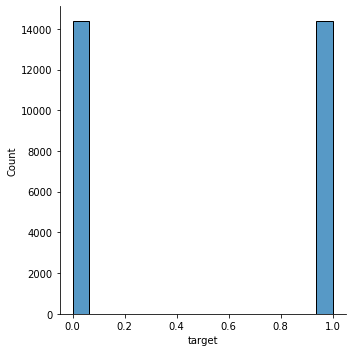

In [150]:
hr_data_oversampled = oversampling(hr_data)
sns.displot(hr_data_oversampled, x='target', kde=False)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [263]:
!pip3 install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/site-packages (0.8.0)


In [264]:
!pip3 install imblearn

In [151]:
for column in hr_data.columns:
    print(sum(np.isnan(hr_data[column])))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [152]:
X = hr_data.drop('target', axis=1).values 
y = hr_data['target'].values 

smote = SMOTE()
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X, y)
counter = Counter(y_hr_SMOTE)
print(counter)

Counter({1.0: 14381, 0.0: 14381})


In [153]:
cols = hr_data.drop('target', axis=1).columns
smote_hr_data = pd.DataFrame(data=X_hr_SMOTE, columns=cols)
smote_hr_data['target'] = y_hr_SMOTE

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

Сначала посмотрим на основные данные:

In [154]:
hr_cols = hr_data.columns

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

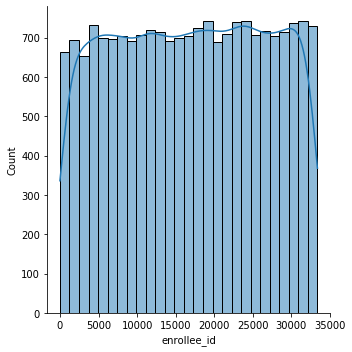

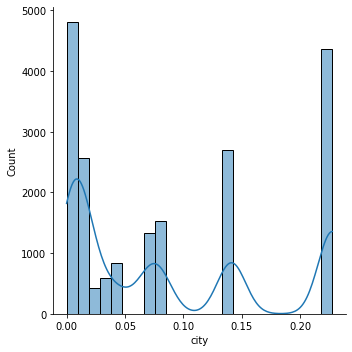

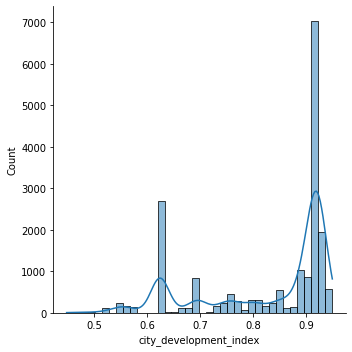

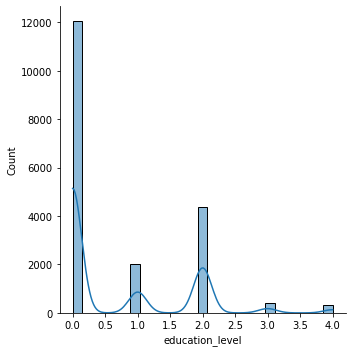

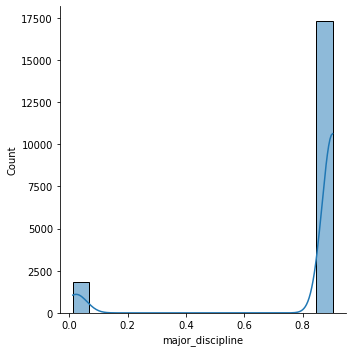

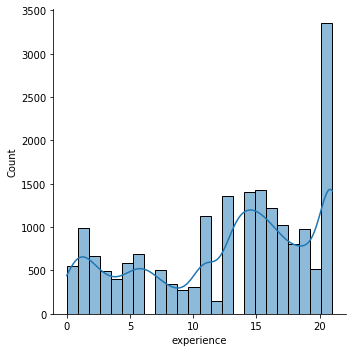

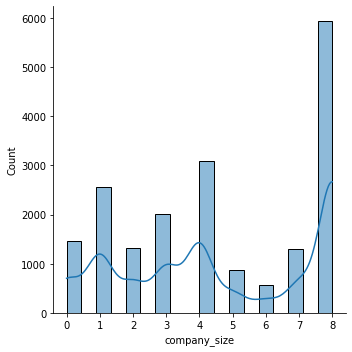

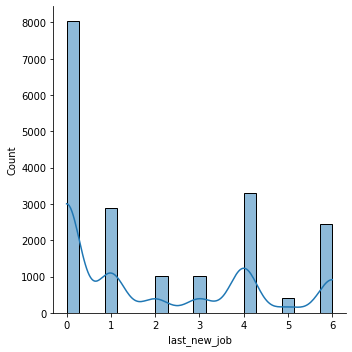

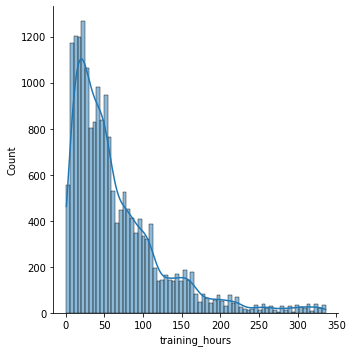

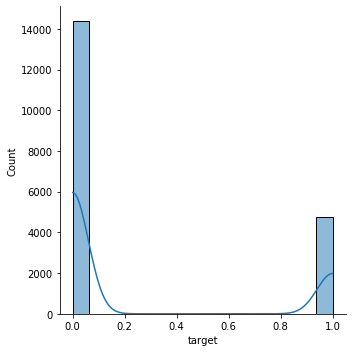

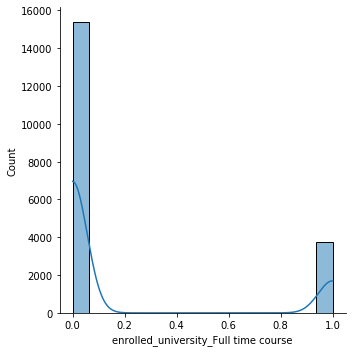

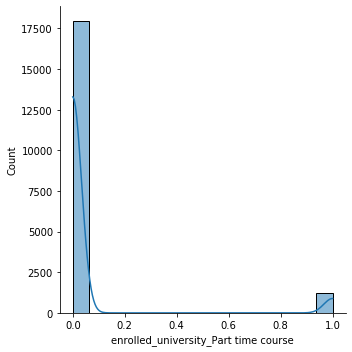

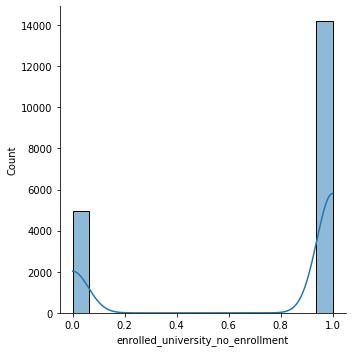

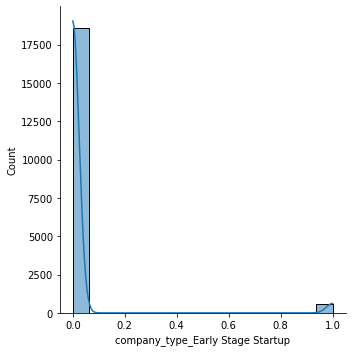

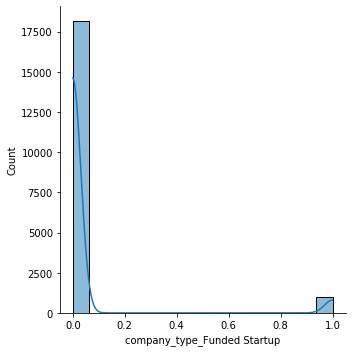

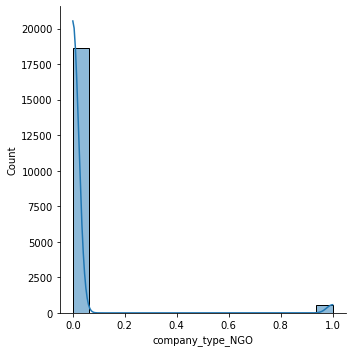

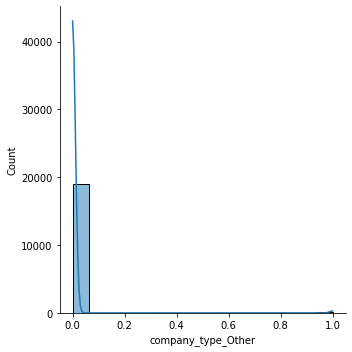

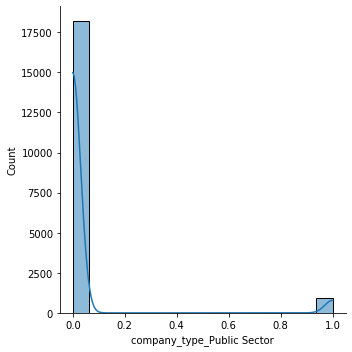

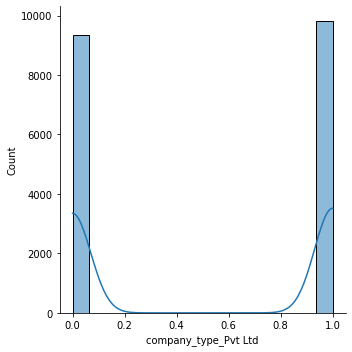

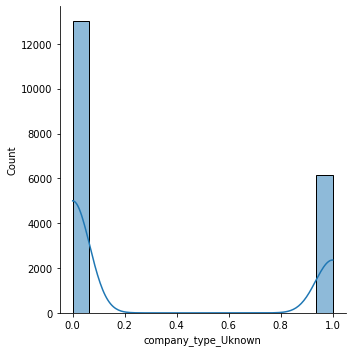

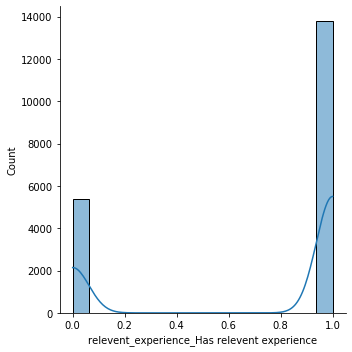

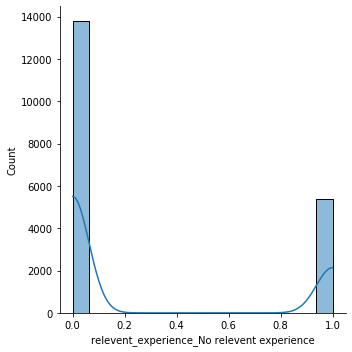

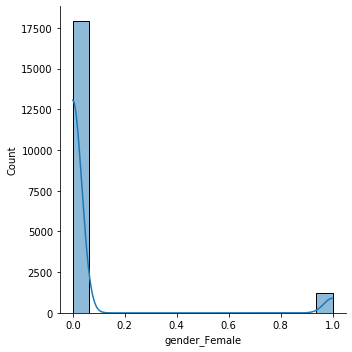

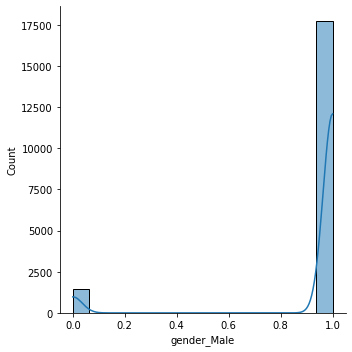

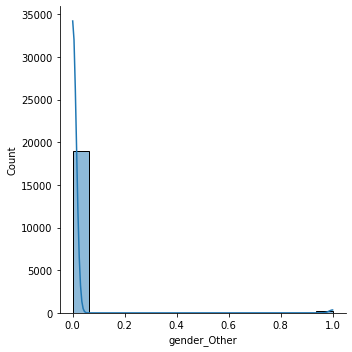

In [155]:
numerical_statistics(hr_data, hr_cols)

Undersampling:

In [156]:
hr_cols = hr_data_undersampled.columns

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

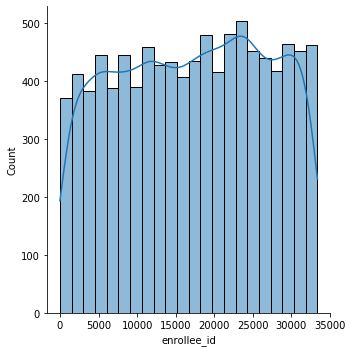

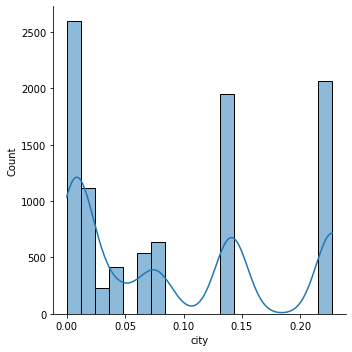

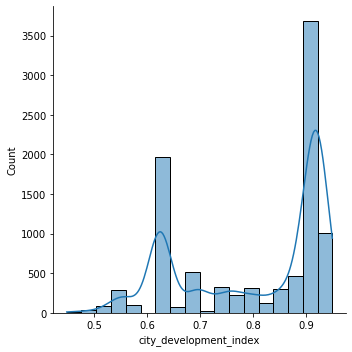

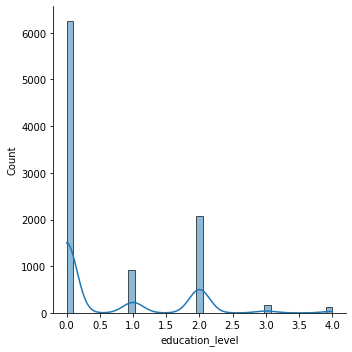

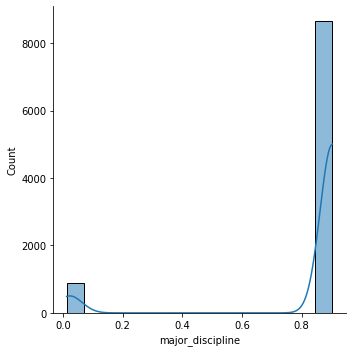

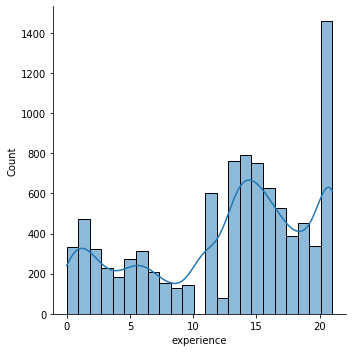

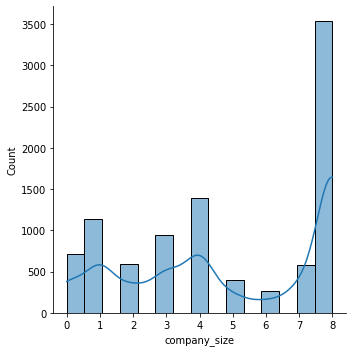

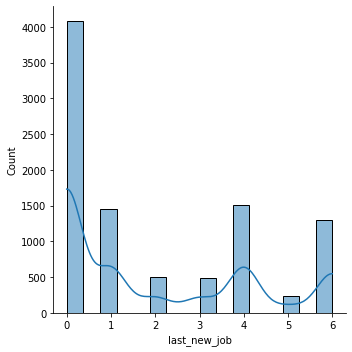

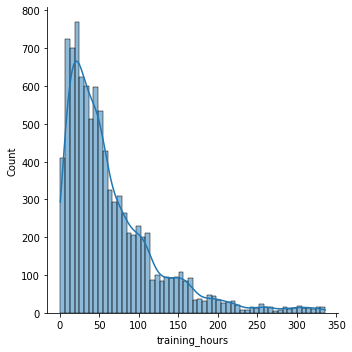

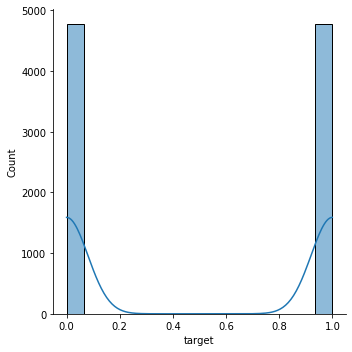

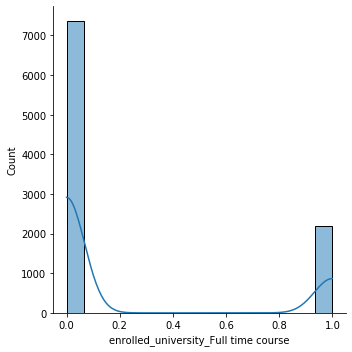

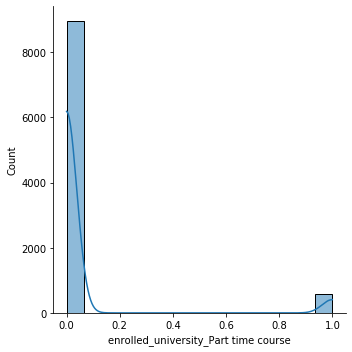

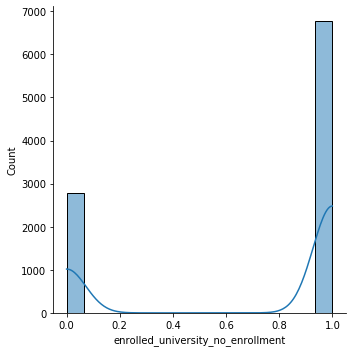

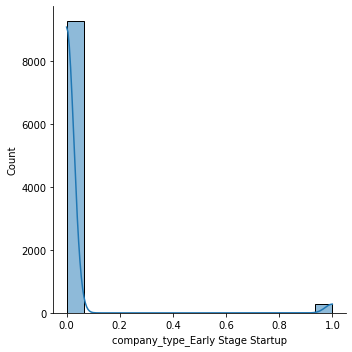

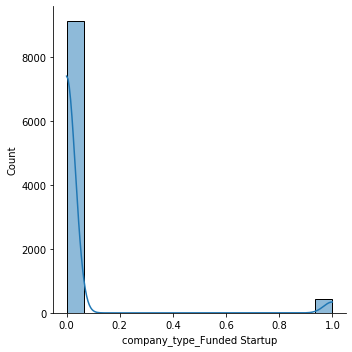

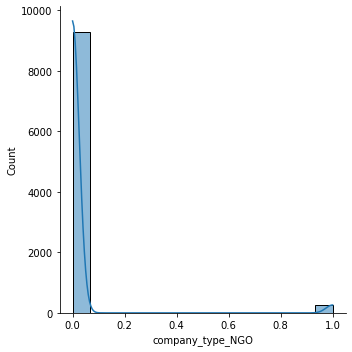

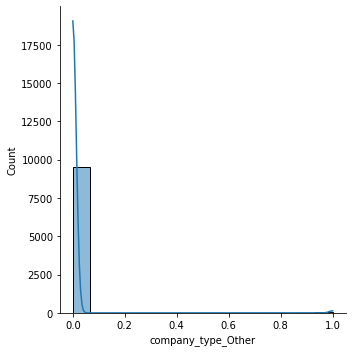

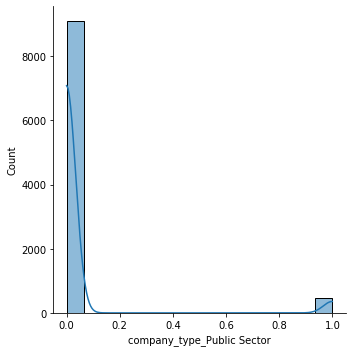

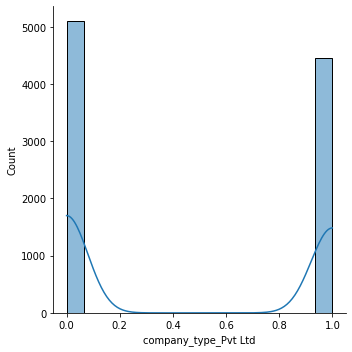

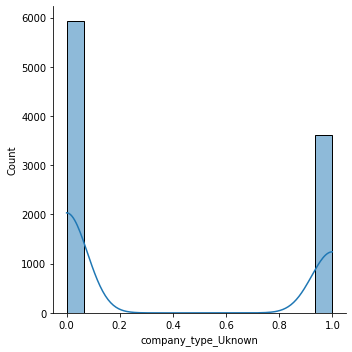

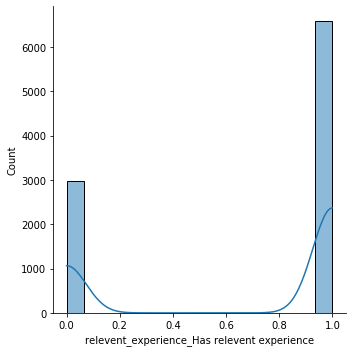

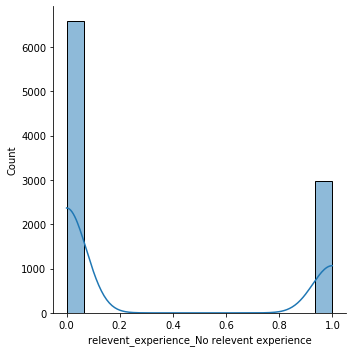

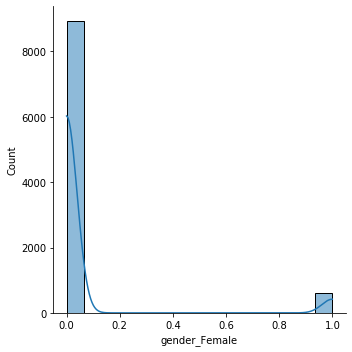

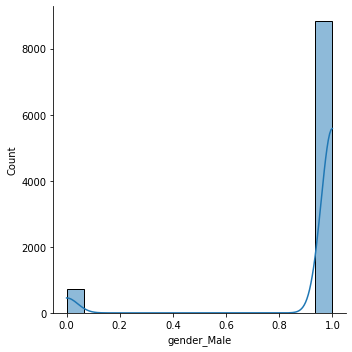

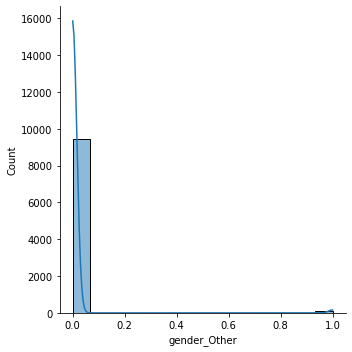

In [157]:
numerical_statistics(hr_data_undersampled, hr_cols)

Значений по некоторым признакам осталось меньше, но основная тендеция распределения данных осталась.

Oversampling:

In [158]:
hr_cols = hr_data_oversampled.columns

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

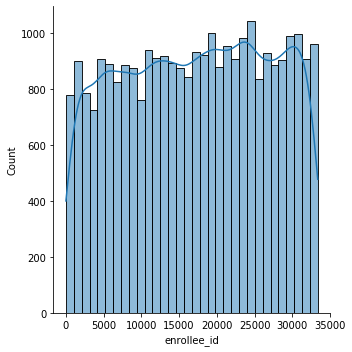

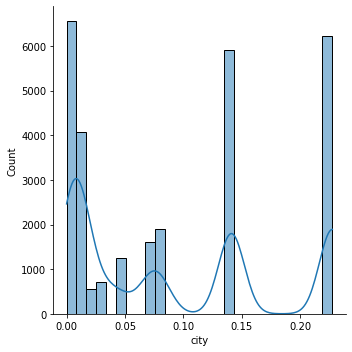

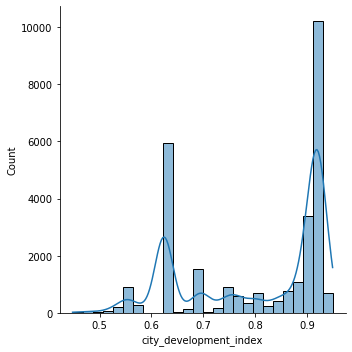

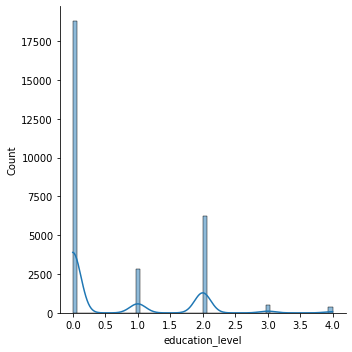

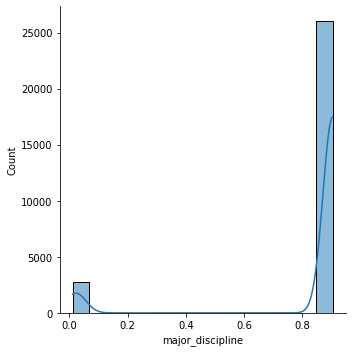

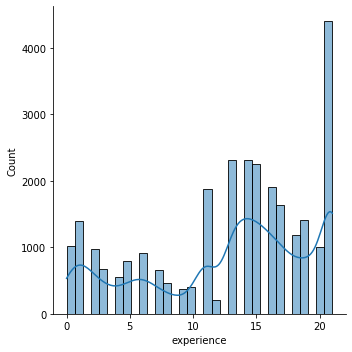

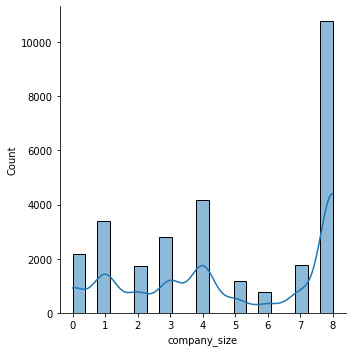

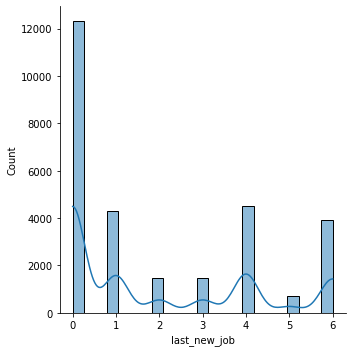

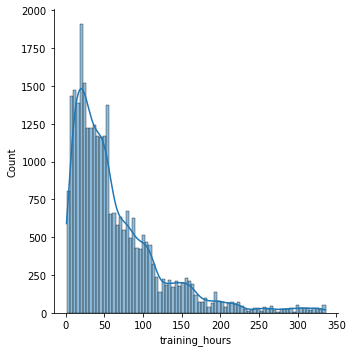

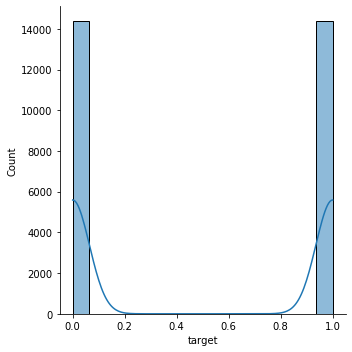

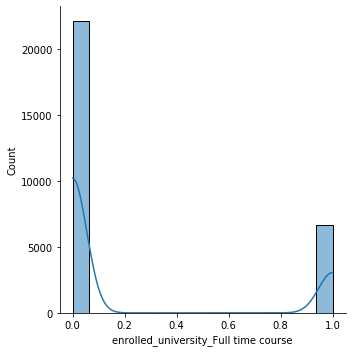

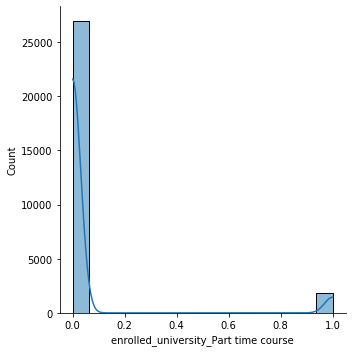

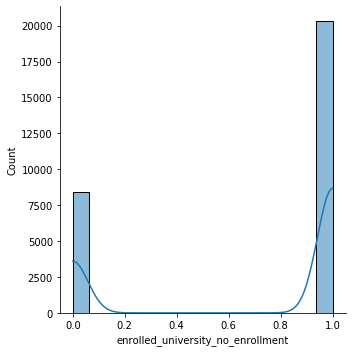

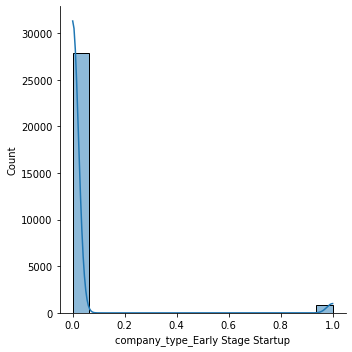

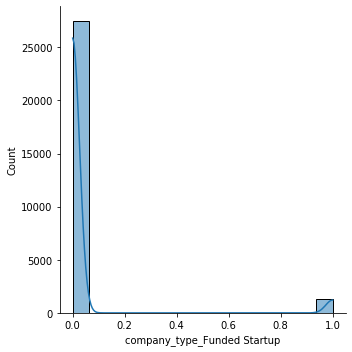

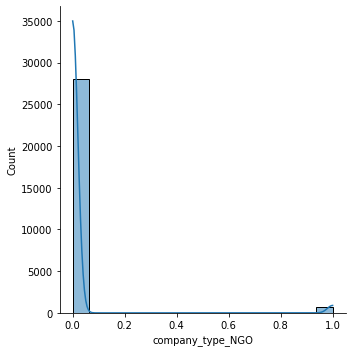

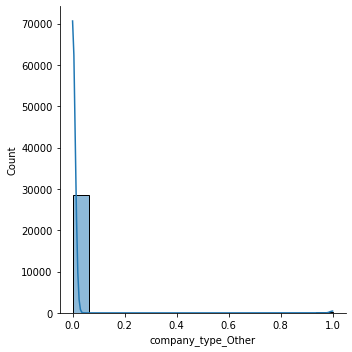

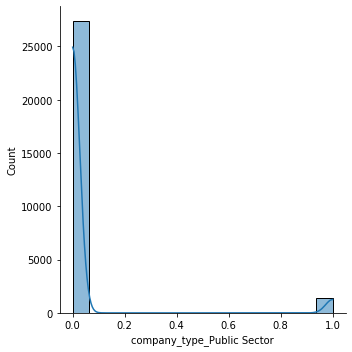

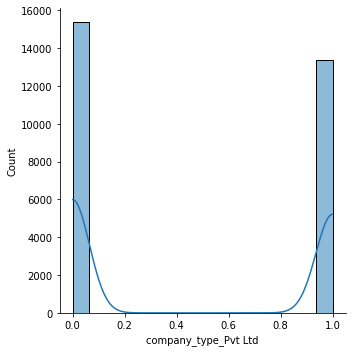

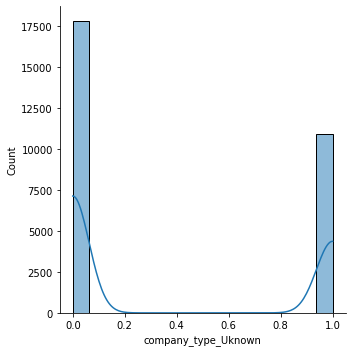

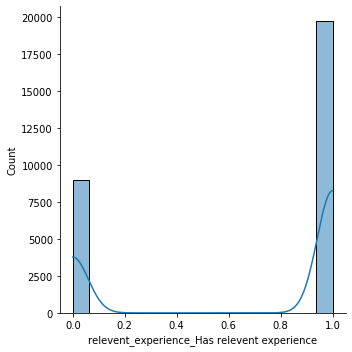

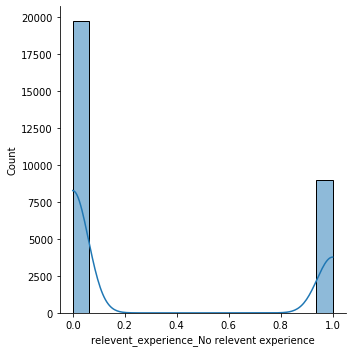

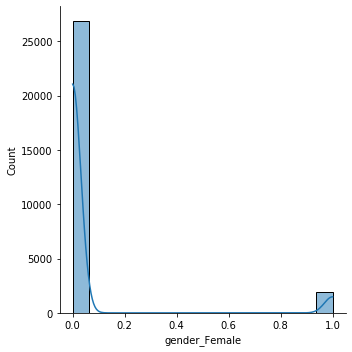

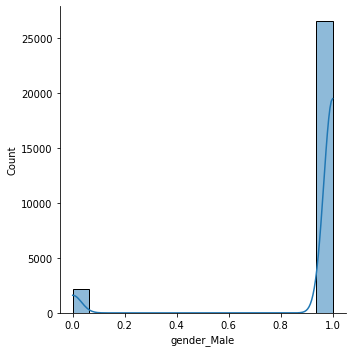

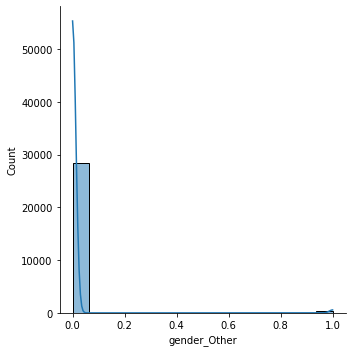

In [159]:
numerical_statistics(hr_data_oversampled, hr_cols)

Распределение данных практически не поменялось, только в training_hours добавилось выбросов и немного поменялось распределение enrollee_id (стало менее однородным).

SMOTE:

In [160]:
hr_cols = smote_hr_data.columns

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

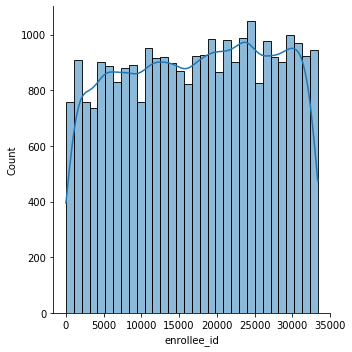

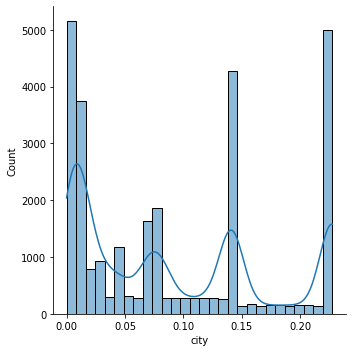

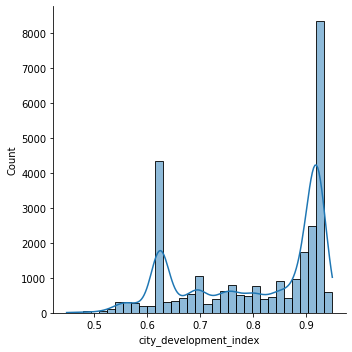

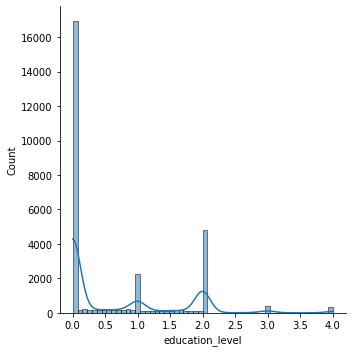

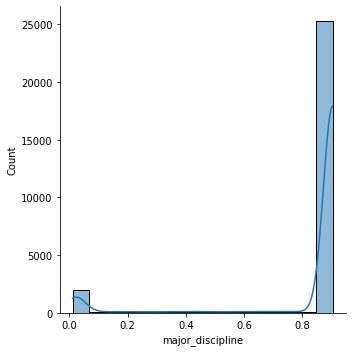

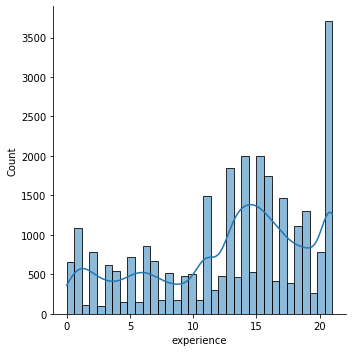

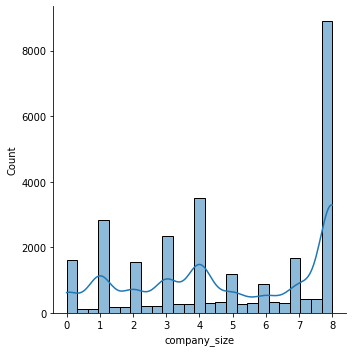

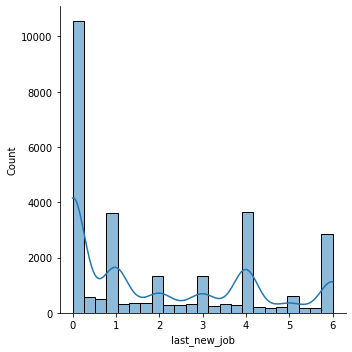

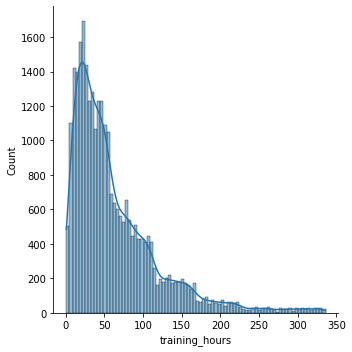

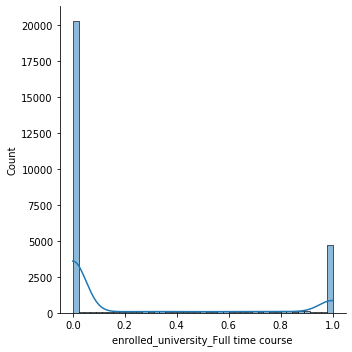

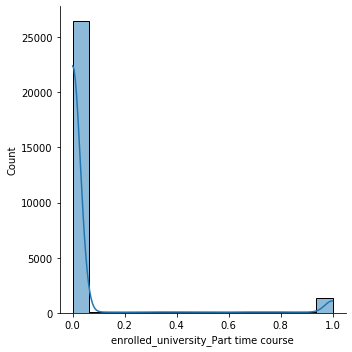

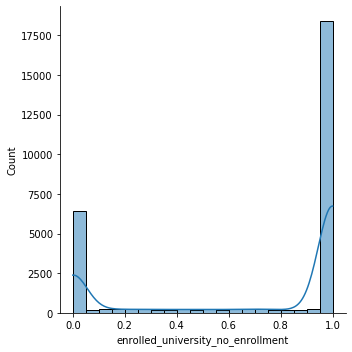

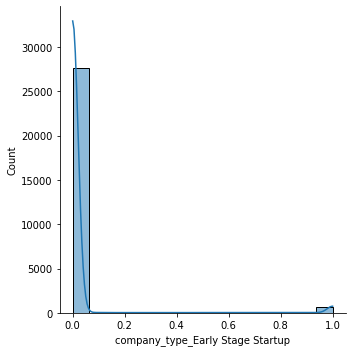

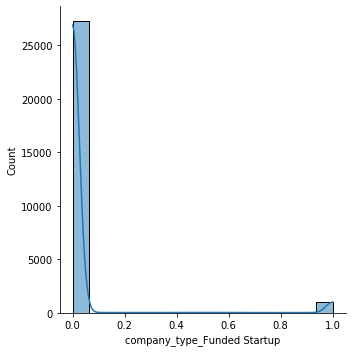

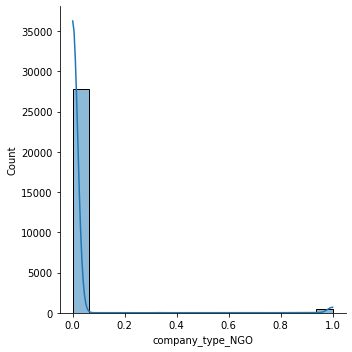

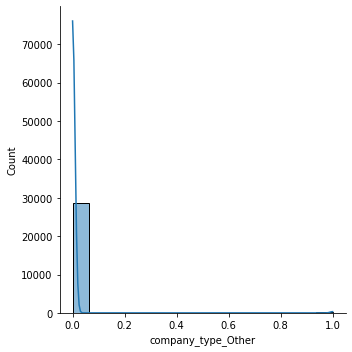

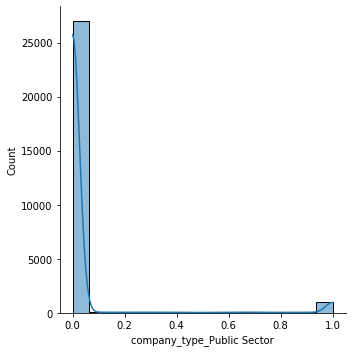

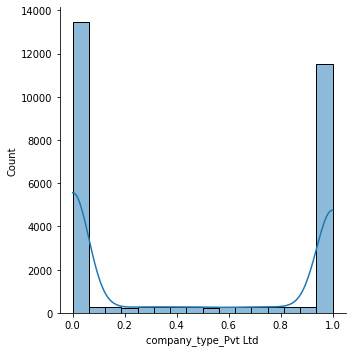

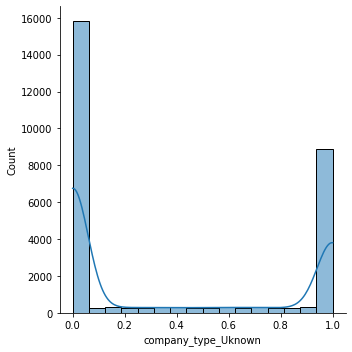

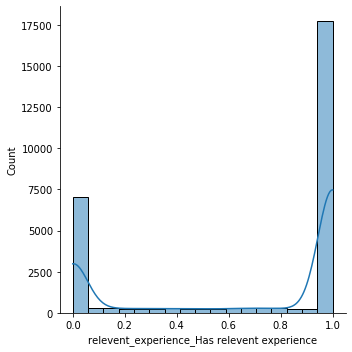

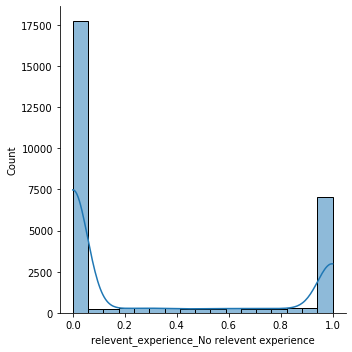

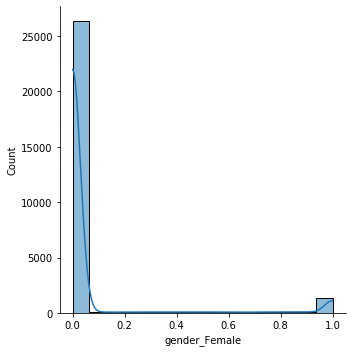

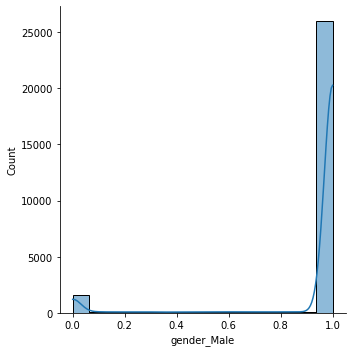

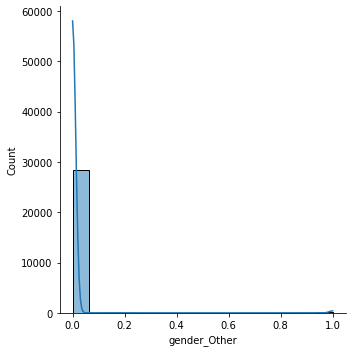

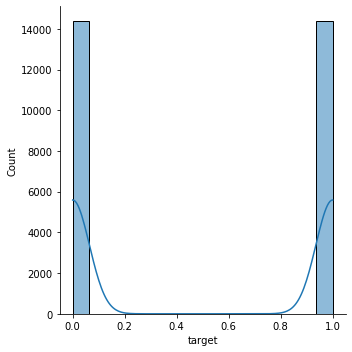

In [161]:
numerical_statistics(smote_hr_data, hr_cols)

У некоторых категориальных признаков добавились "промежуточные" значения, это нехорошо. Распределение числовых признаков практически не поменялось (тоже можно сказать, что распределение enrollee_id стало менее однородным).

_Ваш ответ_